In [1]:
%reset -f
%load_ext autoreload
%autoreload 2

%config Completer.use_jedi = False

import os, sys, matplotlib, glob
%matplotlib notebook
import matplotlib.pyplot as plt
matplotlib.rc('text', usetex=True)
matplotlib.rc('text.latex', preamble=r'\usepackage{cmbright}')
matplotlib.rc('axes.formatter', limits= (-2, 2))
plt.rcParams.update({'font.size': 14})

import numpy as np

home = os.path.expanduser('~/')
if 'jupyter-' in home:
    home = home.replace('jupyter-', '')
    sys.path.append(home + 'Dropbox/DTU2/OpenMM/omm_astools/')  # Change this to wherever you cloned CMMTools
    
def make_colors(c, colmap='viridis'):
    import matplotlib.pyplot as plt
    cmap = plt.get_cmap(colmap)
    colors = [cmap(1.*i/c) for i in range(c)]
    return colors

import nglview as nv
from ase.io import read
from cmm.xray.debye import Debye


The npy files can be obtained here: https://www.dropbox.com/s/3lrmvqwhlzw7rg5/npys.zip?dl=0

Ignore the `s_` files. For now. They Contain scattering signals. 


### Checking for COM behaviour of PtPt and the Entire molecule

Acetonitrile first

<IPython.core.display.Javascript object>


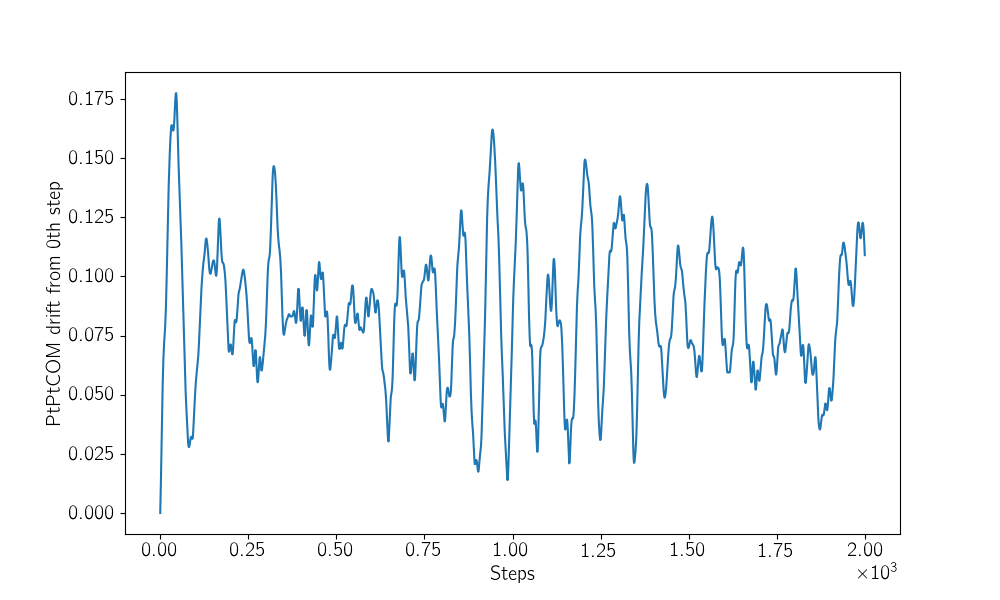

Text(0, 0.5, 'PtPtCOM drift from 0th step')

In [2]:
pos = np.load('apos_ptp_acn_es.npy')
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
for ii in range(1):
    com = np.mean(pos[:, :2, :, ii], axis=1)
    com_drift = np.linalg.norm(com - com[0], axis=1)
    ax.plot(com_drift, 'C0', alpha=1)
    
ax.set_xlabel('Steps')
ax.set_ylabel('PtPtCOM drift from 0th step')

<IPython.core.display.Javascript object>


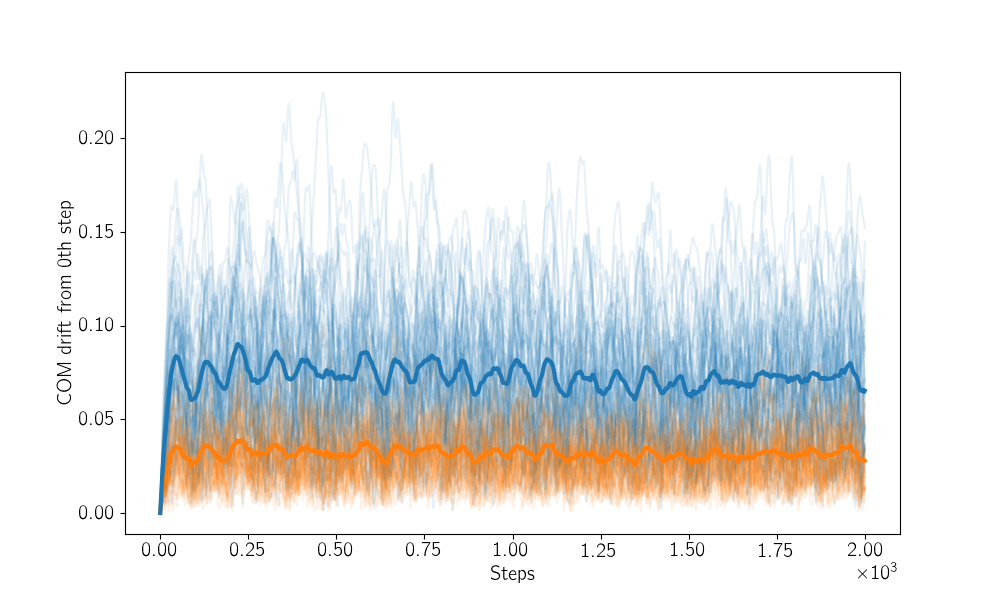

Text(0, 0.5, 'COM drift from 0th step')

In [3]:
from ase.io import read
atoms = read('ptpop_avg_es.xyz')
m = atoms.get_masses()
M = np.sum(m)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ACD = np.zeros((2001, 50))
PCD = np.zeros((2001, 50))

for ii in range(50):
    com_all = np.sum((pos[:, :, :, ii] * m[:, None]), axis=1) / M
    com = np.mean(pos[:, :2, :, ii], axis=1)
    
    allcom_drift = np.linalg.norm(com_all - com_all[0], axis=1)
    ACD[:, ii] = allcom_drift
    ptptcom_drift = np.linalg.norm(com - com[0], axis=1)
    PCD[:, ii] = ptptcom_drift
    
    
    ax.plot(ptptcom_drift, 'C0', alpha=.1, label='PtPt')
    ax.plot(allcom_drift, 'C1', alpha=.1, label='Complex')
    
ax.plot(np.mean(ACD, axis=1), 'C1', lw=3)
ax.plot(np.mean(PCD, axis=1), 'C0', lw=3)
ax.set_xlabel('Steps')
ax.set_ylabel('COM drift from 0th step')

#ax.legend(loc='best')

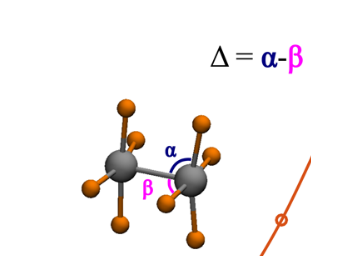
### The $\Delta$ angle

I `ase gui`ed any frame to find indicies of the P atoms. 

Below I have made the angle of only a SINGLE of all the possible angle-definitions in the complex. Like with IrDimen, we should mean over them all.

<IPython.core.display.Javascript object>


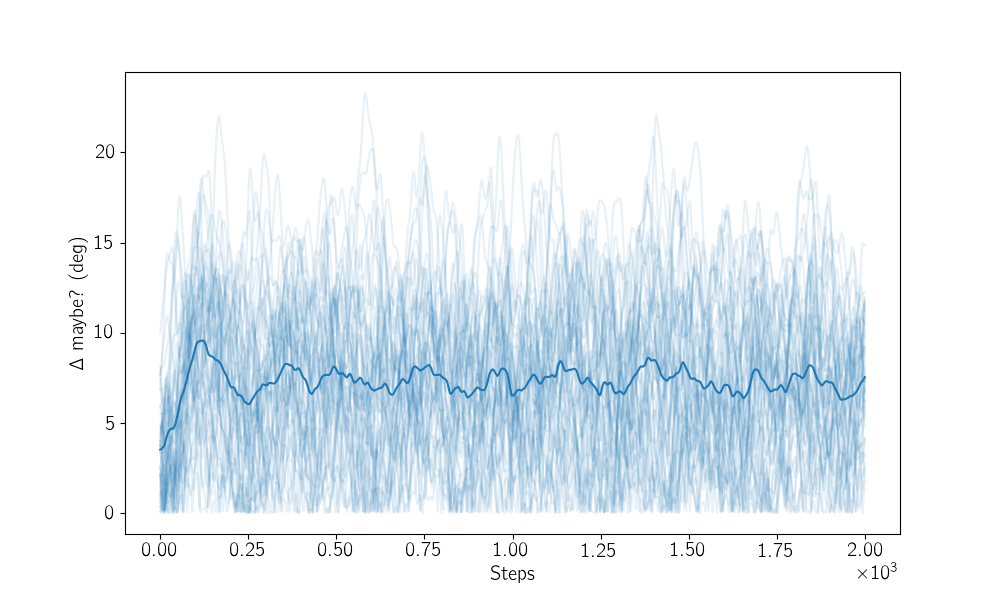

Text(0, 0.5, '$\\Delta$ maybe? (deg)')

In [4]:
ptpt = pos[:, 1, :, :] - pos[:, 0, :, :]
ptpt /= np.linalg.norm(ptpt, axis=1)[:, None]  # unit v
# so Ps horz: 3, 2
#       vert: 5, 4
ptph = pos[:, 3, :, :]  - pos[:, 0, :, :]
ptpv = pos[:, 5, :, :]  - pos[:, 0, :, :]
ptph /= np.linalg.norm(ptph, axis=1)[:, None]
ptpv /= np.linalg.norm(ptpv, axis=1)[:, None]

alpha = np.degrees(np.arctan2(np.linalg.norm(np.cross(ptpt, ptpv, axis=1), axis=1), 
                              np.einsum('ijk,ijk->ik', ptpt, ptpv)))  # array-wise dot.. 
beta = np.degrees(np.arctan2(np.linalg.norm(np.cross(ptpt, ptph, axis=1), axis=1), 
                            np.einsum('ijk,ijk->ik', ptpt, ptph)))
delta = np.abs(alpha - beta)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
for i in range(50):
    ax.plot(delta[:, i], 'C0', alpha=0.1)
ax.plot(np.mean(delta, axis=1 ))
ax.set_xlabel('Steps')
ax.set_ylabel('$\Delta$ maybe? (deg)')


## Water

<IPython.core.display.Javascript object>


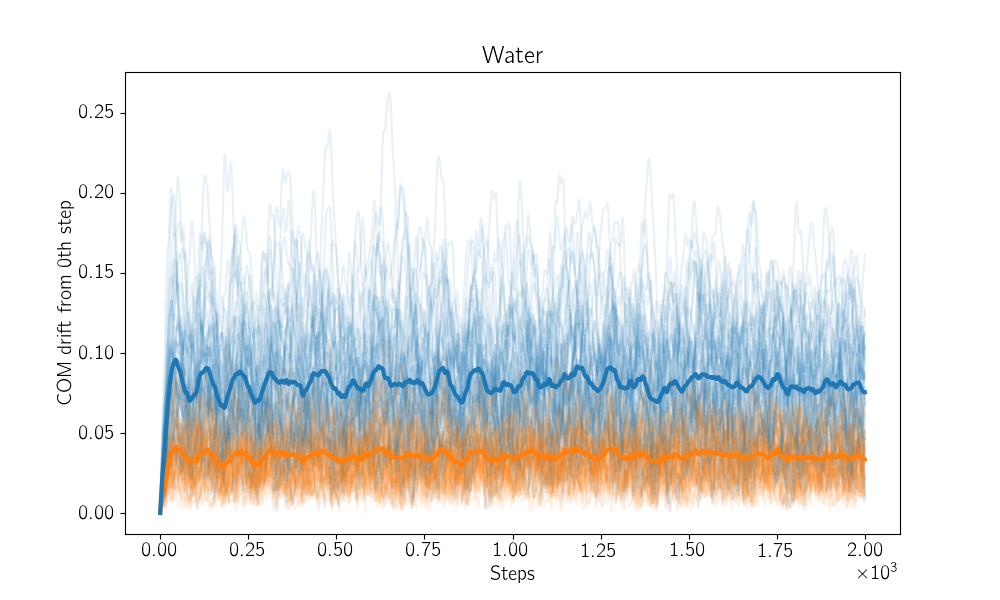

Text(0.5, 1.0, 'Water')

In [5]:
pos = np.load('apos_ptp_h2o_es.npy')


atoms = read('ptpop_avg_es.xyz')
m = atoms.get_masses()
M = np.sum(m)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ACD = np.zeros((2001, 50))
PCD = np.zeros((2001, 50))

for ii in range(50):
    com_all = np.sum((pos[:, :, :, ii] * m[:, None]), axis=1) / M
    com = np.mean(pos[:, :2, :, ii], axis=1)
    
    allcom_drift = np.linalg.norm(com_all - com_all[0], axis=1)
    ACD[:, ii] = allcom_drift
    ptptcom_drift = np.linalg.norm(com - com[0], axis=1)
    PCD[:, ii] = ptptcom_drift
    
    
    ax.plot(ptptcom_drift, 'C0', alpha=.1, label='PtPt')
    ax.plot(allcom_drift, 'C1', alpha=.1, label='Complex')
    
ax.plot(np.mean(ACD, axis=1), 'C1', lw=3)
ax.plot(np.mean(PCD, axis=1), 'C0', lw=3)
ax.set_xlabel('Steps')
ax.set_ylabel('COM drift from 0th step')
ax.set_title('Water')
#ax.legend(loc='best')